In [1]:
#kmeans clustering 

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
customer_data = pd.read_csv("/Users/admin/Desktop/Credit Card Customer Data.csv", na_values = " ")

In [5]:
customer_data

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [6]:
customer_data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
customer_data = customer_data.drop(["Customer Key","Sl_No"], axis =1 )

In [9]:
customer_data

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaled_data = scaler.fit_transform(customer_data)

In [14]:
scaled_data

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

In [15]:
from sklearn.cluster import KMeans

In [16]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [20]:
%matplotlib inline

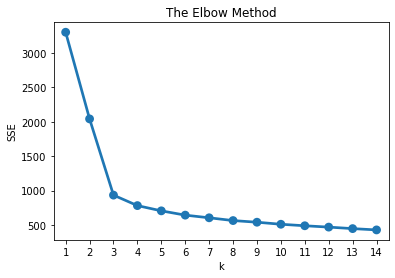

In [28]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters = k, random_state = 55)
    kmeans.fit(scaled_data)
    sse[k] = kmeans.inertia_
plt.title("The Elbow Method")
plt.xlabel("k")
plt.ylabel("SSE")
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

In [29]:
#best number of clustters is 3

In [30]:
model = KMeans(n_clusters = 3, random_state = 32)

In [31]:
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=32)

In [32]:
model.labels_

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [33]:
new_df = pd.DataFrame(scaled_data)

In [34]:
new_df

,0,1,2,3,4
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [35]:
new_df["labels"] = model.labels_

In [36]:
new_df

,0,1,2,3,4,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [41]:
new_df = new_df.rename(columns = {0:"Avg credit Limit", 1: "total_credit_card", 2: "visits_bank", 3: "visits_online", 4: "total_calls", "labels": "labels"})

In [42]:
new_df

,Avg credit Limit,total_credit_card,visits_bank,visits_online,total_calls,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [43]:
new_df.groupby("labels").agg({"mean", "count"})

Avg credit Limit       total_credit_card       visits_bank        \
                   mean count              mean count        mean count   
labels                                                                    
0             -0.021062   386          0.373690   386    0.666395   386   
1             -0.595796   224         -1.059623   224   -0.901518   224   
2              2.831764    50          1.862226    50   -1.105763    50   

       visits_online       total_calls        
                mean count        mean count  
labels                                        
0          -0.553672   386   -0.553005   386  
1           0.322997   224    1.148109   224  
2           2.827319    50   -0.874330    50

In [44]:
from mpl_toolkits.mplot3d import Axes3D

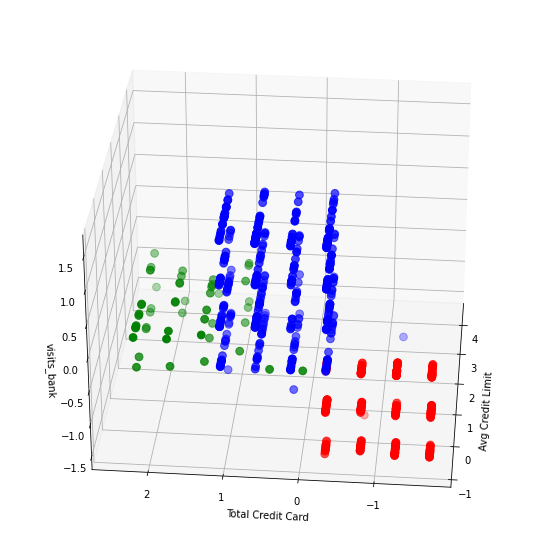

In [50]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(new_df["Avg credit Limit"][new_df.labels == 0], new_df["total_credit_card"][new_df.labels == 0], new_df["visits_bank"][new_df.labels == 0], c = "blue", s =60)
ax.scatter(new_df["Avg credit Limit"][new_df.labels == 1], new_df["total_credit_card"][new_df.labels == 1], new_df["visits_bank"][new_df.labels == 1], c = "red", s =60)
ax.scatter(new_df["Avg credit Limit"][new_df.labels == 2], new_df["total_credit_card"][new_df.labels == 2], new_df["visits_bank"][new_df.labels == 2], c = "green", s =60)

ax.view_init(30,185)
plt.xlabel("Avg Credit Limit")
plt.ylabel("Total Credit Card")
ax.set_zlabel("visits_bank")
plt.show()